<a href="https://colab.research.google.com/github/AaronScherf/gxe-gee-lmm/blob/master/7_ML_Analysis_Holdout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparison of Machine Learning Models for Crop Selection

Testing cross-validation frameworks, feature engineering, feature selection, and SciKitLearn machine learning system with linear regression models.

Also doing an initial check on the differences between CIMMYT environmental data and Earth Engine remote sensing data for a linear model.

In [ ]:
# To connect to a local runtime:
# https://research.google.com/colaboratory/local-runtimes.html

# Run the following from the command line on your local machine:

# pip install jupyter_http_over_ws
# jupyter serverextension enable --py jupyter_http_over_ws

# conda create -n gxe_gee python=3.7 ipykernel jupyter anaconda
# conda activate gxe_gee
# ipython kernel install --name gxe_gee --user

# jupyter notebook \ --NotebookApp.allow_origin='https://colab.research.google.com' \ --port=8891 \ --NotebookApp.port_retries=0
# jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --port=8891 --NotebookApp.port_retries=0

# If you run into issues connecting with a local kernel, try changing the port number

## Setting up the Environment

In [1]:
# Install Packages

# Import Packages
import os
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import linear_model, preprocessing

DISPLAY_PRECISION = 4
pd.set_option("display.precision", DISPLAY_PRECISION)

In [2]:
# Mount User's Drive
# Copy and paste the passkey from your Google account
# You should use the same account that is operating the Colab file
# Ignore if you aren't accessing this file in Google Colab

# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# parent_dir_name = 'GxE with GEE'

# for dirpath, subdirs, files in os.walk('/content'):
#   if parent_dir_name in subdirs:
#     parent_path = dirpath + "/" + parent_dir_name

# parent_path

'/content/drive/My Drive/Research/GxE with GEE'

In [2]:
# Set Data Path
## Change the destination to your Drive directory containing the folder 'raw_data.zip'
# data_path_end = '/Colab Workspace/Data'
# os.chdir(parent_path + data_path_end)

# # Print the current working directory
os.getcwd()

'/home/jupyter/gxe-gee-lmm'

In [ ]:
os.chdir('C:/Users/theaa/Downloads/gxe_pkl')

## Import Selected Versions of Data

In [2]:
y_train_model = pd.read_pickle('y_train_scaled.pkl')
y_test_model = pd.read_pickle('y_test_scaled.pkl')
y_holdout_model = pd.read_pickle('y_holdout_scaled.pkl')

In [3]:
#@title Choose Data Type for Models

Data = 'CIMMYT Environment and PCs' #@param ["CIMMYT Environment", "CIMMYT Environment and COP Values", "CIMMYT Environment and PCs", "GEE Environment", "GEE Environment and COP Values", "GEE Environment and PCs", "Both Environment", "Both Environment and COP Values", "Both Environment and PCs"]

if Data == 'CIMMYT Environment' :
    X_train_model = pd.read_pickle('X_train_scaled.pkl')
    X_test_model = pd.read_pickle('X_test_scaled.pkl')
    X_holdout_model = pd.read_pickle('X_holdout_scaled.pkl')

# if Data == 'CIMMYT Environment and COP Values' :
#   X_train_model = pd.read_pickle('X_train_scaled_GID.pkl')
#   X_test_model = pd.read_pickle('X_test_scaled_GID.pkl')
#   X_holdout_model = pd.read_pickle('X_holdout_scaled_GID.pkl')

if Data == 'CIMMYT Environment and PCs' :
    X_train_model = pd.read_pickle('X_train_scaled_PCA.pkl')
    X_test_model = pd.read_pickle('X_test_scaled_PCA.pkl')
    X_holdout_model = pd.read_pickle('X_holdout_scaled_PCA.pkl')

# if Data == 'GEE Environment' :
#     X_train_model = pd.read_pickle('X_train_gee_scaled.pkl')
#     X_test_model = pd.read_pickle('X_test_gee_scaled.pkl')
#     X_holdout_model = pd.read_pickle('X_holdout_gee_scaled.pkl')

# if Data == 'GEE Environment and COP Values' :
#   X_train_model = pd.read_pickle('X_train_gee_scaled_GID.pkl')
#   X_test_model = pd.read_pickle('X_test_gee_scaled_GID.pkl')
#   X_holdout_model = pd.read_pickle('X_holdout_gee_scaled_GID.pkl')

# if Data == 'GEE Environment and PCs' :
#   X_train_model = pd.read_pickle('X_train_gee_scaled_PCA.pkl')
#   X_test_model = pd.read_pickle('X_test_gee_scaled_PCA.pkl')
#   X_holdout_model = pd.read_pickle('X_holdout_gee_scaled_PCA.pkl')

# if Data == 'Both Environment' :
#   X_train_model = pd.read_pickle('X_train_combined.pkl')
#   X_test_model = pd.read_pickle('X_test_combined.pkl')
#   X_holdout_model = pd.read_pickle('X_holdout_combined.pkl')

# if Data == 'Both Environment and COP Values' :
#   X_train_model = pd.read_pickle('X_train_combined_GID.pkl')
#   X_test_model = pd.read_pickle('X_test_combined_GID.pkl')
#   X_holdout_model = pd.read_pickle('X_holdout_combined_GID.pkl')

# if Data == 'Both Environment and PCs' :
#   X_train_model = pd.read_pickle('X_train_combined_PCA.pkl')
#   X_test_model = pd.read_pickle('X_test_combined_PCA.pkl')
#   X_holdout_model = pd.read_pickle('X_holdout_combined_PCA.pkl')

In [ ]:
#@title Select Sample of Data for Models
SAMPLE_SIZE = 1 #@param {type:"slider", min:0, max:1, step:0.1}

X_train_model = X_train_model.sample(frac= SAMPLE_SIZE,random_state=123)
X_test_model = X_test_model.sample(frac= SAMPLE_SIZE,random_state=123)
y_train_model = y_train_model.sample(frac= SAMPLE_SIZE,random_state=123)
y_test_model = y_test_model.sample(frac= SAMPLE_SIZE,random_state=123)

In [205]:
X_train_model.shape

(122484, 158)

## Feature Selection to Speed Convergence

https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html
from sklearn.ensemble import ExtraTreesRegressor

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html#sklearn.feature_selection.SelectFromModel
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesRegressor(n_estimators=700)
clf = clf.fit(X_train_model, y_train_model.values.ravel())

In [266]:
clf_train_pred = clf.predict(X_train_model)

print(metrics.r2_score(y_train_model, clf_train_pred))
print(np.sqrt(metrics.mean_squared_error(y_train_model, clf_train_pred)))
print(metrics.mean_absolute_error(y_train_model, clf_train_pred))

0.8837775028191321
0.3409142079480815
0.11395182641204941


In [267]:
model = SelectFromModel(clf, prefit=True, threshold="median")
X_new_rf = model.transform(X_train_model)
X_new_rf.shape

(122484, 220)

In [268]:
X_new_rf = pd.DataFrame(X_new_rf, index = X_train_model.index, columns = X_train_model.loc[:,model.get_support()].columns)
X_new_rf

,"(total_precipitation, 0)","(total_precipitation, 1)","(total_precipitation, 2)","(total_precipitation, 3)","(total_precipitation, 4)","(total_precipitation, 5)","(total_precipitation, 6)","(total_precipitation, 7)","(total_precipitation, 8)","(total_precipitation, 9)",...,"(tmmn, 9)","(tmmx, 4)","(tmmx, 6)","(tmmx, 7)","(tmmx, 8)","(tmmx, 9)","(av_altitude, 0)",PC_0,PC_2,PC_3
Unique_ID,,,,,,,,,,,,,,,,,,,,,
8HTYWT_11001_69587_51,-0.7026,-0.7752,-0.7795,-7.2153e-01,-0.6566,-0.5437,-0.1091,2.4180,1.0002,0.4195,...,0.1474,0.8214,0.6954,0.4212,0.2314,-0.0349,0.5111,76.5696,-31.0921,-26.0202
21ESWYT_53014_8890_1549,-0.3241,-0.3316,-0.0125,1.3344e+00,1.3858,1.9809,0.8296,-0.1272,-0.2443,-0.7650,...,-0.5847,0.9032,0.4444,0.1504,-0.1442,-0.3253,2.0024,58.4852,-13.1803,32.3064
18SAWYT_22207_486152_105,-0.4656,-0.6741,-0.0264,-5.3680e-01,-0.6758,-0.4184,-0.7728,1.9565,1.0078,1.1427,...,1.1790,0.4124,1.1975,0.7985,0.6172,0.7135,-0.4948,-30.1181,15.3584,-10.4601
7ESWYT_51010_7741_7,1.8093,1.8920,0.6013,5.8278e-01,-0.4668,-0.4963,-0.4948,-0.6454,0.1436,-0.3741,...,-0.6734,-0.5693,-0.5196,-0.5074,-0.3067,-0.3141,-0.7995,14.0330,-2.3935,-39.7941
8SAWYT_19314_289455_7,-0.0010,0.0006,0.0007,9.1749e-05,-0.0010,-0.0005,-0.0011,-0.0008,-0.0014,-0.0011,...,0.0028,0.0007,0.0024,0.0034,0.0040,0.0038,-0.0010,3.8489,-19.7375,-17.2028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19ESWYT_22611_67297_23,-0.6801,-0.3088,-0.0470,-3.4854e-01,-0.6727,-0.6835,-0.5377,0.2413,-0.2914,-0.1292,...,1.1901,0.3469,1.0669,1.0500,1.0537,0.9592,-0.6161,-18.3712,-6.3413,5.8607
36ESWYT_51002_546353_47,0.6813,-0.4153,0.1412,-1.6435e-01,-0.2636,-0.3292,-0.4744,0.1819,-0.7711,-0.4113,...,-1.0839,-0.7492,-0.9614,-1.2619,-1.3117,-1.1853,-0.6852,2.6463,-3.1209,1.4841
11ESWYT_50202_8105_13,1.1149,1.4587,4.1661,2.2685e+00,0.1901,0.8803,-0.0436,0.3189,0.7493,0.7113,...,-0.2963,-0.1275,-0.4694,-0.4397,-0.4183,-0.3811,0.1091,-48.0999,-2.7181,4.2465


In [269]:
X_new_rf_test = model.transform(X_test_model)
X_new_rf_test = pd.DataFrame(X_new_rf_test, index = X_test_model.index, columns = X_new_rf.columns)
X_new_rf_test

,"(total_precipitation, 0)","(total_precipitation, 1)","(total_precipitation, 2)","(total_precipitation, 3)","(total_precipitation, 4)","(total_precipitation, 5)","(total_precipitation, 6)","(total_precipitation, 7)","(total_precipitation, 8)","(total_precipitation, 9)",...,"(tmmn, 9)","(tmmx, 4)","(tmmx, 6)","(tmmx, 7)","(tmmx, 8)","(tmmx, 9)","(av_altitude, 0)",PC_0,PC_2,PC_3
Unique_ID,,,,,,,,,,,,,,,,,,,,,
15HTWYT_22403_562899_61,-0.2729,-0.7659,-0.6613,-0.6692,0.7075,0.6995,1.4872,1.1643,0.8400,1.5605,...,0.8726,1.4558,1.0789,0.7861,0.6230,0.5210,-0.6382,-19.4503,-1.8514,-3.6811
23SAWYT_22213_559568_26,-0.1402,-0.7068,-0.4917,-0.7141,-0.6349,-0.2909,-0.2479,0.3850,0.7282,2.2565,...,0.9617,0.7511,1.2301,0.9899,0.7350,0.6334,-0.7475,22.3244,-12.6979,9.0274
11ESWYT_65301_7822_9,-0.6896,-0.7118,-0.2838,0.0904,-0.1726,-0.2783,0.4170,1.4500,-0.0377,-0.3184,...,-0.4424,-0.2486,-0.9057,-0.9413,-0.9957,-0.5347,-0.4504,-50.0812,0.2840,-2.1470
8HRWYT_51202_91811_214,-0.1100,-0.3881,-0.3210,-0.2322,3.1239,1.1319,1.2734,4.7902,-0.3930,-0.6224,...,-1.3673,-0.9042,-1.1777,-1.1839,-1.3215,-1.1412,-0.2388,-35.2793,15.2590,-5.6993
21ESWYT_62101_25787_256,0.5912,0.8009,-0.2720,0.1805,-0.3583,-0.1341,-0.2696,-0.2682,-0.5690,-0.7951,...,-1.6793,-1.0845,-2.3664,-2.5135,-2.5533,-2.5113,-0.5990,-64.1916,-9.5825,6.1856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24ESWYT_12205_207425_62,4.1859,9.0731,3.9351,6.5164,0.9184,0.9412,0.8391,-0.5474,-0.6271,-0.7050,...,-0.9327,0.7347,0.5652,0.3591,0.0733,-0.3101,2.3008,10.6220,-21.7346,-20.7855
6ESWYT_22607_7691_50,0.8382,0.3954,-0.7379,-0.1156,-0.1457,-0.0078,-0.7498,-0.6183,1.2735,1.0324,...,0.7389,-0.4453,0.2428,0.6697,0.5721,0.6446,-0.2486,97.1160,-10.1511,24.6885
19ESWYT_42101_65217_164,0.4490,-0.0609,0.1150,-0.6793,-0.6551,-0.3872,-0.3775,0.2437,-0.1437,0.8033,...,0.3711,0.6528,-0.3113,-0.1067,0.1140,0.5098,-0.4588,5.0100,-13.3882,2.5271


In [270]:
X_new_rf_holdout = model.transform(X_holdout_model)
X_new_rf_holdout = pd.DataFrame(X_new_rf_holdout, index = X_holdout_model.index, columns = X_new_rf.columns)
X_new_rf_holdout

,"(total_precipitation, 0)","(total_precipitation, 1)","(total_precipitation, 2)","(total_precipitation, 3)","(total_precipitation, 4)","(total_precipitation, 5)","(total_precipitation, 6)","(total_precipitation, 7)","(total_precipitation, 8)","(total_precipitation, 9)",...,"(tmmn, 9)","(tmmx, 4)","(tmmx, 6)","(tmmx, 7)","(tmmx, 8)","(tmmx, 9)","(av_altitude, 0)",PC_0,PC_2,PC_3
Unique_ID,,,,,,,,,,,,,,,,,,,,,
22SAWYT_22234_537241_108,0.0056,0.7018,-0.4380,-0.4280,-0.3159,-0.5770,-0.5665,0.5016,2.6206,0.3318,...,0.7523,0.8404,1.0782,0.7055,0.4450,0.2125,-0.3545,15.7189,3.4841,5.1789
5HTYWT_10028_49434_555,-0.5043,-0.4232,-0.2723,-0.1033,-0.2280,0.5105,-0.5332,-0.7822,-0.9411,-0.7927,...,-0.2735,-0.3408,0.2491,0.1898,0.2611,-0.2496,-0.6734,-58.0349,-10.3797,12.7657
12SAWYT_10002_279819_57,0.0020,-0.0018,-0.0004,0.0002,0.0058,-0.0027,-0.0013,-0.0018,-0.0033,-0.0014,...,-0.0064,0.0011,-0.0038,-0.0067,-0.0087,-0.0077,0.0042,16.7560,-9.7273,13.2519
9HRWYT_50208_43142_1942,1.1107,0.3047,-0.1078,3.3307,-0.2646,0.1345,1.1841,0.6100,0.4157,0.9228,...,-0.0059,1.3817,0.8861,0.7152,0.4757,0.2012,-0.3716,-49.0333,-4.7105,-13.7896
35ESWYT_20002_540618_69,1.6555,1.3818,2.2232,0.2678,-0.5104,-0.4616,0.3455,-0.3590,-0.6655,-0.5672,...,0.6854,-1.4563,-0.2261,0.1412,0.6596,0.7872,0.7204,27.7343,6.6389,9.9690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11HRWYT_22219_210681_172,-0.6633,-0.7722,-0.2172,-0.4170,-0.4257,-0.6214,-0.7772,0.7264,0.5801,2.5586,...,0.9418,0.2826,1.0681,0.8708,0.6494,0.5168,-0.5396,17.7532,2.9906,13.4305
7HTYWT_22501_92561_51,0.0020,-0.0018,-0.0004,0.0002,0.0058,-0.0027,-0.0013,-0.0018,-0.0033,-0.0014,...,-0.0064,0.0011,-0.0038,-0.0067,-0.0087,-0.0077,0.0042,0.5120,5.4892,-2.6368
23ESWYT_20012_90670_90,-0.6834,-0.7340,-0.4704,0.4226,0.3489,-0.1411,-0.2097,-0.8474,-0.9535,-0.9067,...,-0.9649,1.7754,-1.1664,-1.3376,-0.8528,-0.0354,0.7375,-30.2721,-5.2811,6.4874


In [271]:
X_train_model = X_new_rf
X_test_model = X_new_rf_test
X_holdout_model = X_new_rf_holdout
print(X_train_model.shape)
print(X_test_model.shape)
print(X_holdout_model.shape)

(122484, 220)
(21615, 220)
(25430, 220)


## GridSearchCV for ML Models

https://alfurka.github.io/2018-11-18-grid-search/

https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.03-Hyperparameters-and-Model-Validation.ipynb#scrollTo=OcK-JlX-ZCLo

In [4]:
X_build_model = pd.concat([X_train_model, X_test_model])
X_build_model.shape

(144099, 158)

In [5]:
y_build_model = pd.concat([y_train_model, y_test_model])
y_build_model.shape

(144099, 1)

In [6]:
df = pd.DataFrame([['Train', 'RF'],  ['Train', 'NN'], ["Train", "XGB"],
                    ['Test', 'RF'],['Test','NN'], ["Test", "XGB"]],
                   columns=[Data, 'Model']) 

results_grid = pd.DataFrame(index = pd.MultiIndex.from_frame(df), columns=['R','R_2','Adj_R_2','RMSE','MAE'])

In [7]:
df = pd.DataFrame([['Build', 'RF'], ['Build', 'NN'], ["Build", "XGB"],
                    ['Holdout', 'RF'],['Holdout','NN'], ["Holdout", "XGB"]],
                   columns=[Data, 'Model']) 

holdout_results_grid = pd.DataFrame(index = pd.MultiIndex.from_frame(df), columns=['R','R_2','Adj_R_2','RMSE','MAE'])

In [8]:
results_grid

R  R_2 Adj_R_2 RMSE  MAE
CIMMYT Environment and PCs Model                            
Train                      RF     NaN  NaN     NaN  NaN  NaN
                           NN     NaN  NaN     NaN  NaN  NaN
                           XGB    NaN  NaN     NaN  NaN  NaN
Test                       RF     NaN  NaN     NaN  NaN  NaN
                           NN     NaN  NaN     NaN  NaN  NaN
                           XGB    NaN  NaN     NaN  NaN  NaN

### Random Forest Regression

In [9]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

from sklearn.model_selection import GridSearchCV
import sklearn.ensemble
from sklearn import metrics

RF = sklearn.ensemble.RandomForestRegressor(n_jobs=-1)

parameters = {'min_samples_split' : [5], 'n_estimators' : [400, 600], 
              'max_depth' : [None]}

rf_regressor = GridSearchCV(RF, parameters, scoring = 'neg_mean_squared_error', cv = 5)

In [ ]:
import time
start = time.time()

rf_fitted = rf_regressor.fit(X_train_model, y_train_model.values.ravel())

runtime = time.time() - start
print('Total runtime was (s): {}'.format(runtime))

In [ ]:
rf_train_pred = rf_fitted.predict(X_train_model)

results_grid.loc['Train','RF']['R'] = np.corrcoef(y_train_model.iloc[:,0], rf_train_pred)[0,1]
results_grid.loc['Train','RF']['R_2'] = metrics.r2_score(y_train_model, rf_train_pred)
results_grid.loc['Train','RF']['Adj_R_2'] = 1-(1-results_grid.loc['Train','RF']['R_2'])*(y_train_model.shape[0]-1)/(y_train_model.shape[0]-X_train_model.shape[1]-1)
results_grid.loc['Train','RF']['RMSE'] = np.sqrt(metrics.mean_squared_error(y_train_model, rf_train_pred))
results_grid.loc['Train','RF']['MAE'] = metrics.mean_absolute_error(y_train_model, rf_train_pred)

rf_test_pred = rf_fitted.predict(X_test_model)

results_grid.loc['Test','RF']['R'] = np.corrcoef(y_test_model.iloc[:,0], rf_test_pred)[0,1]
results_grid.loc['Test','RF']['R_2'] = metrics.r2_score(y_test_model, rf_test_pred)
results_grid.loc['Test','RF']['Adj_R_2'] = 1-(1-results_grid.loc['Test','RF']['R_2'])*(y_test_model.shape[0]-1)/(y_test_model.shape[0]-X_test_model.shape[1]-1)
results_grid.loc['Test','RF']['RMSE'] = np.sqrt(metrics.mean_squared_error(y_test_model, rf_test_pred))
results_grid.loc['Test','RF']['MAE'] = metrics.mean_absolute_error(y_test_model, rf_test_pred)

csv_name = Data + "_RF_Test_Results.csv"
results_grid.to_csv(csv_name)

results_grid

In [ ]:
rf_best_params = rf_fitted.best_params_
filename = Data+"_rf_best_params.txt"
param_text = Data + ": " + str(rf_best_params)
text_file = open(filename, "w")
n = text_file.write(param_text)
text_file.close()
print(rf_best_params)

In [ ]:
pd.DataFrame(rf_fitted.best_estimator_.feature_importances_, index=X_train_model.columns).sort_values(by=0, ascending=False)

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

sns.scatterplot(rf_test_pred, y_test_model['GRAIN_YIELD'])
plt.xlabel('Predicted Yield')
plt.ylabel('Observed Yield')
plt.title(Data+" Random Forest Test Set")
plt.savefig(Data + ' RF_test_scatter.png')

In [ ]:
sns.residplot(rf_test_pred, y_test_model['GRAIN_YIELD'])
plt.xlabel('Predicted Yield')
plt.ylabel('Residual')
plt.title(Data+" Random Forest Test Set")
plt.savefig(Data + ' RF_test_resid.png')

#### Random Forest on Holdout Set

In [ ]:
filename = Data+"_rf_best_params.txt"
rf_best_params = open(filename, "r")
rf_best_params = rf_best_params.read()

import re

rf_best_params = re.search('{(.*)}', rf_best_params)
rf_best_params = "{" + str(rf_best_params.group(1)) + "}"

import ast
rf_best_params = ast.literal_eval(rf_best_params)
rf_best_params

In [ ]:
rf_holdout_regressor = sklearn.ensemble.RandomForestRegressor(**rf_best_params, n_jobs=-1)

In [ ]:
import time
start = time.time()

rf_fitted_holdout = rf_holdout_regressor.fit(X_build_model, y_build_model.values.ravel())

runtime = time.time() - start
print('Total runtime was (s): {}'.format(runtime))

In [ ]:
rf_build_pred = rf_fitted_holdout.predict(X_build_model)

holdout_results_grid.loc['Build','RF']['R'] = np.corrcoef(y_build_model.iloc[:,0], rf_build_pred)[0,1]
holdout_results_grid.loc['Build','RF']['R_2'] = metrics.r2_score(y_build_model, rf_build_pred)
holdout_results_grid.loc['Build','RF']['Adj_R_2'] = 1-(1-holdout_results_grid.loc['Build','RF']['R_2'])*(y_build_model.shape[0]-1)/(y_build_model.shape[0]-X_build_model.shape[1]-1)
holdout_results_grid.loc['Build','RF']['RMSE'] = np.sqrt(metrics.mean_squared_error(y_build_model, rf_build_pred))
holdout_results_grid.loc['Build','RF']['MAE'] = metrics.mean_absolute_error(y_build_model, rf_build_pred)

rf_holdout_pred = rf_fitted_holdout.predict(X_holdout_model)

holdout_results_grid.loc['Holdout','RF']['R'] = np.corrcoef(y_holdout_model.iloc[:,0], rf_holdout_pred)[0,1]
holdout_results_grid.loc['Holdout','RF']['R_2'] = metrics.r2_score(y_holdout_model, rf_holdout_pred)
holdout_results_grid.loc['Holdout','RF']['Adj_R_2'] = 1-(1-holdout_results_grid.loc['Holdout','RF']['R_2'])*(y_holdout_model.shape[0]-1)/(y_holdout_model.shape[0]-X_holdout_model.shape[1]-1)
holdout_results_grid.loc['Holdout','RF']['RMSE'] = np.sqrt(metrics.mean_squared_error(y_holdout_model, rf_holdout_pred))
holdout_results_grid.loc['Holdout','RF']['MAE'] = metrics.mean_absolute_error(y_holdout_model, rf_holdout_pred)

csv_name = Data + "_" + str(X_holdout_model.shape[1]) + "_RF_Holdout_Results.csv"
holdout_results_grid.to_csv(csv_name)

holdout_results_grid

In [ ]:
sns.scatterplot(rf_holdout_pred, y_holdout_model['GRAIN_YIELD'])
plt.title(Data+" Random Forest Holdout Set")
plt.xlabel('Predicted Yield')
plt.ylabel('Observed Yield')
plt.savefig(Data + ' RF_holdout_scatter.png')

In [ ]:
sns.residplot(rf_holdout_pred, y_holdout_model['GRAIN_YIELD'])
plt.title(Data+" Random Forest Holdout Set")
plt.xlabel('Predicted Yield')
plt.ylabel('Residual')
plt.savefig(Data + ' RF_holdout_resid.png')

### Multi-Layer Perceptron

In [33]:
# https://scikit-neuralnetwork.readthedocs.io/en/latest/guide_model.html#example-regression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

nn = MLPRegressor()

parameters = {'hidden_layer_sizes' : [300, 500],
              "alpha": [0.0002],
              'max_iter':[500]}

nn_regressor = GridSearchCV(nn, parameters, scoring = 'neg_mean_squared_error', cv = 5)


In [34]:
import time
start = time.time()

nn_fitted = nn_regressor.fit(X_train_model, y_train_model.values.ravel())

print('Total runtime was (s): {}'.format(time.time() - start))

Total runtime was (s): 1523.9071843624115


In [35]:
from sklearn import metrics

nn_train_pred = nn_fitted.predict(X_train_model)

results_grid.loc['Train','NN']['R'] = np.corrcoef(y_train_model.iloc[:,0], nn_train_pred)[0,1]
results_grid.loc['Train','NN']['R_2'] = metrics.r2_score(y_train_model, nn_train_pred)
results_grid.loc['Train','NN']['Adj_R_2'] = 1-(1-results_grid.loc['Train','NN']['R_2'])*(y_train_model.shape[0]-1)/(y_train_model.shape[0]-X_train_model.shape[1]-1)
results_grid.loc['Train','NN']['RMSE'] = np.sqrt(metrics.mean_squared_error(y_train_model, nn_train_pred))
results_grid.loc['Train','NN']['MAE'] = metrics.mean_absolute_error(y_train_model, nn_train_pred)

nn_test_pred = nn_fitted.predict(X_test_model)

results_grid.loc['Test','NN']['R'] = np.corrcoef(y_test_model.iloc[:,0], nn_test_pred)[0,1]
results_grid.loc['Test','NN']['R_2'] = metrics.r2_score(y_test_model, nn_test_pred)
results_grid.loc['Test','NN']['Adj_R_2'] = 1-(1-results_grid.loc['Test','NN']['R_2'])*(y_train_model.shape[0]-1)/(y_train_model.shape[0]-X_train_model.shape[1]-1)
results_grid.loc['Test','NN']['RMSE'] = np.sqrt(metrics.mean_squared_error(y_test_model, nn_test_pred))
results_grid.loc['Test','NN']['MAE'] = metrics.mean_absolute_error(y_test_model, nn_test_pred)

csv_name = Data + "_" + str(X_holdout_model.shape[1]) + "_NN_Test_Results.csv"
results_grid.to_csv(csv_name)

results_grid

R     R_2 Adj_R_2    RMSE     MAE
CIMMYT Environment Model                                        
Train              RF     0.9332  0.8709  0.8709  0.3593  0.2528
                   NN     0.9117  0.8291   0.829  0.4134  0.2914
                   XGB       NaN     NaN     NaN     NaN     NaN
Test               RF     0.8722   0.758  0.7574  0.4919  0.3358
                   NN     0.9012  0.8063  0.8063  0.4401  0.3176
                   XGB       NaN     NaN     NaN     NaN     NaN

In [36]:
nn_best_params = nn_fitted.best_params_
filename = Data+"_nn_best_params.txt"
param_text = Data + ": " + str(nn_best_params)
text_file = open(filename, "w")
n = text_file.write(param_text)
text_file.close()
nn_best_params

{'alpha': 0.0002, 'hidden_layer_sizes': 500, 'max_iter': 500}

In [ ]:
# pd.DataFrame(nn_fitted.best_estimator_.coefs_.values, index=X_train_model.columns).sort_values(by=0, ascending=False)

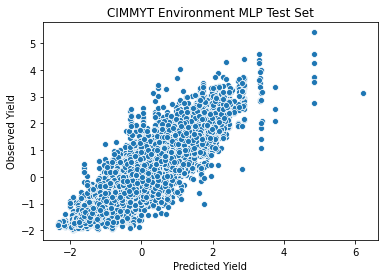

In [37]:
import seaborn as sns
sns.scatterplot(nn_test_pred[nn_test_pred < 15], y_test_model['GRAIN_YIELD'][nn_test_pred < 15])
plt.title(Data+" MLP Test Set")
plt.xlabel('Predicted Yield')
plt.ylabel('Observed Yield')
plt.savefig(Data + ' nn_test_scatter.png')

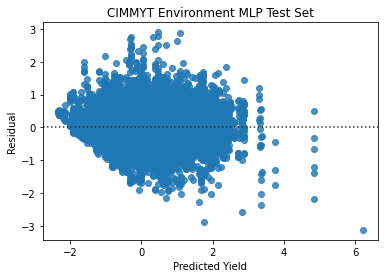

In [38]:
sns.residplot(nn_test_pred[nn_test_pred < 15], y_test_model['GRAIN_YIELD'][nn_test_pred < 15])
plt.title(Data+" MLP Test Set")
plt.xlabel('Predicted Yield')
plt.ylabel('Residual')
plt.savefig(Data + ' nn_test_resid.png')

In [ ]:
filename = Data+"_nn_best_params.txt"
nn_best_params = open(filename, "r")
nn_best_params = nn_best_params.read()

import re

nn_best_params = re.search('{(.*)}', nn_best_params)
nn_best_params = "{" + str(nn_best_params.group(1)) + "}"

import ast
nn_best_params = ast.literal_eval(nn_best_params)
nn_best_params

In [39]:
nn_holdout_regressor = MLPRegressor(**nn_best_params)

In [40]:
import time
start = time.time()

nn_fitted_holdout = nn_holdout_regressor.fit(X_build_model, y_build_model.values.ravel())

runtime = time.time() - start
print('Total runtime was (s): {}'.format(runtime))

Total runtime was (s): 252.74102759361267


In [41]:
nn_build_pred = nn_fitted_holdout.predict(X_build_model)

holdout_results_grid.loc['Build','NN']['R'] = np.corrcoef(y_build_model.iloc[:,0], nn_build_pred)[0,1]
holdout_results_grid.loc['Build','NN']['R_2'] = metrics.r2_score(y_build_model, nn_build_pred)
holdout_results_grid.loc['Build','NN']['Adj_R_2'] = 1-(1-holdout_results_grid.loc['Build','NN']['R_2'])*(y_build_model.shape[0]-1)/(y_build_model.shape[0]-X_build_model.shape[1]-1)
holdout_results_grid.loc['Build','NN']['RMSE'] = np.sqrt(metrics.mean_squared_error(y_build_model, nn_build_pred))
holdout_results_grid.loc['Build','NN']['MAE'] = metrics.mean_absolute_error(y_build_model, nn_build_pred)

nn_holdout_pred = nn_fitted_holdout.predict(X_holdout_model)

holdout_results_grid.loc['Holdout','NN']['R'] = np.corrcoef(y_holdout_model.iloc[:,0], nn_holdout_pred)[0,1]
holdout_results_grid.loc['Holdout','NN']['R_2'] = metrics.r2_score(y_holdout_model, nn_holdout_pred)
holdout_results_grid.loc['Holdout','NN']['Adj_R_2'] = 1-(1-holdout_results_grid.loc['Holdout','NN']['R_2'])*(y_holdout_model.shape[0]-1)/(y_holdout_model.shape[0]-X_holdout_model.shape[1]-1)
holdout_results_grid.loc['Holdout','NN']['RMSE'] = np.sqrt(metrics.mean_squared_error(y_holdout_model, nn_holdout_pred))
holdout_results_grid.loc['Holdout','NN']['MAE'] = metrics.mean_absolute_error(y_holdout_model, nn_holdout_pred)

csv_name = Data + "_" + str(X_holdout_model.shape[1]) + "_NN_Holdout_Results.csv"
holdout_results_grid.to_csv(csv_name)

holdout_results_grid

R     R_2 Adj_R_2    RMSE     MAE
CIMMYT Environment Model                                        
Build              RF     0.9344   0.873   0.873  0.3563  0.2506
                   NN     0.9107  0.8282  0.8281  0.4145  0.2952
                   XGB       NaN     NaN     NaN     NaN     NaN
Holdout            RF     0.9106  0.8285  0.8282  0.4141   0.291
                   NN     0.9082  0.8237  0.8233  0.4198  0.3007
                   XGB       NaN     NaN     NaN     NaN     NaN

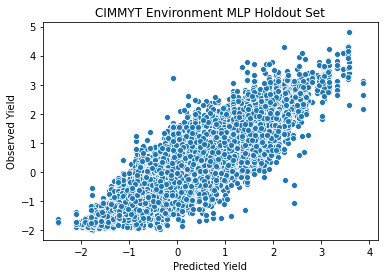

In [42]:
sns.scatterplot(nn_holdout_pred, y_holdout_model['GRAIN_YIELD'])
plt.title(Data+" MLP Holdout Set")
plt.xlabel('Predicted Yield')
plt.ylabel('Observed Yield')
plt.savefig(Data + ' nn_holdout_scatter.png')

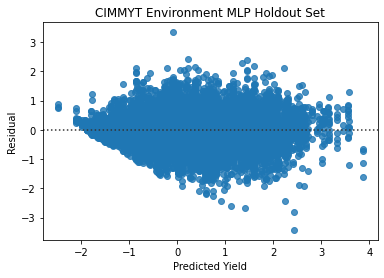

In [43]:
sns.residplot(nn_holdout_pred, y_holdout_model['GRAIN_YIELD'])
plt.title(Data+" MLP Holdout Set")
plt.xlabel('Predicted Yield')
plt.ylabel('Residual')
plt.savefig(Data + ' nn_holdout_resid.png')

### XGBoost Regressor

Intro: https://xgboost.readthedocs.io/en/latest/get_started.html

Python Package: https://xgboost.readthedocs.io/en/latest/python/index.html

API: https://xgboost.readthedocs.io/en/latest/python/python_api.html

Parameters: https://xgboost.readthedocs.io/en/latest/parameter.html

In [45]:
!pip install xgboost

     |████████████████████████████████| 109.7 MB 9.8 kB/s  eta 0:00:01


In [46]:
# Fit and analyze accuracy of XG Boost Regressor
import xgboost as xgb
import time

XGB = xgb.XGBRegressor()

parameters = {'learning_rate' : [0.1], 'max_depth': [8], 'n_estimators':[400, 600]}

XGB_regressor = GridSearchCV(XGB, parameters, scoring = 'neg_mean_squared_error', cv=5)


In [47]:
start = time.time()

XGB_fitted = XGB_regressor.fit(X_train_model,y_train_model)

print('Total runtime was (s): {}'.format(time.time() - start))

Total runtime was (s): 276.0744025707245


In [48]:
XGB_train_pred = XGB_fitted.predict(X_train_model)

results_grid.loc['Train','XGB']['R'] = np.corrcoef(y_train_model.iloc[:,0], XGB_train_pred)[0,1]
results_grid.loc['Train','XGB']['R_2'] = metrics.r2_score(y_train_model, XGB_train_pred)
results_grid.loc['Train','XGB']['Adj_R_2'] = 1-(1-results_grid.loc['Train','XGB']['R_2'])*(y_train_model.shape[0]-1)/(y_train_model.shape[0]-X_train_model.shape[1]-1)
results_grid.loc['Train','XGB']['RMSE'] = np.sqrt(metrics.mean_squared_error(y_train_model, XGB_train_pred))
results_grid.loc['Train','XGB']['MAE'] = metrics.mean_absolute_error(y_train_model, XGB_train_pred)

XGB_test_pred = XGB_fitted.predict(X_test_model)

results_grid.loc['Test','XGB']['R'] = np.corrcoef(y_test_model.iloc[:,0], XGB_test_pred)[0,1]
results_grid.loc['Test','XGB']['R_2'] = metrics.r2_score(y_test_model, XGB_test_pred)
results_grid.loc['Test','XGB']['Adj_R_2'] = 1-(1-results_grid.loc['Test','XGB']['R_2'])*(y_test_model.shape[0]-1)/(y_test_model.shape[0]-X_test_model.shape[1]-1)
results_grid.loc['Test','XGB']['RMSE'] = np.sqrt(metrics.mean_squared_error(y_test_model, XGB_test_pred))
results_grid.loc['Test','XGB']['MAE'] = metrics.mean_absolute_error(y_test_model, XGB_test_pred)

csv_name = Data + "_" + str(X_holdout_model.shape[1]) + "_XGB_Test_Results.csv"
results_grid.to_csv(csv_name)

results_grid

R     R_2 Adj_R_2    RMSE     MAE
CIMMYT Environment Model                                        
Train              RF     0.9332  0.8709  0.8709  0.3593  0.2528
                   NN     0.9117  0.8291   0.829  0.4134  0.2914
                   XGB    0.9332  0.8708  0.8708  0.3594   0.253
Test               RF     0.8722   0.758  0.7574  0.4919  0.3358
                   NN     0.9012  0.8063  0.8063  0.4401  0.3176
                   XGB     0.872  0.7477   0.747  0.5023   0.368

In [49]:
XGB_best_params = XGB_fitted.best_params_
filename = Data+"_XGB_best_params.txt"
param_text = Data + ": " + str(XGB_best_params)
text_file = open(filename, "w")
n = text_file.write(param_text)
text_file.close()
XGB_best_params

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 600}

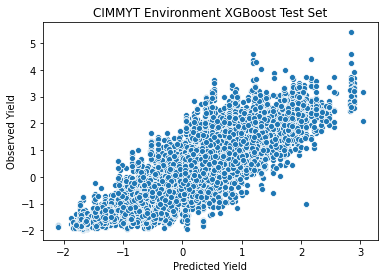

In [50]:
import seaborn as sns
sns.scatterplot(XGB_test_pred, y_test_model['GRAIN_YIELD'])
plt.title(Data+" XGBoost Test Set")
plt.xlabel('Predicted Yield')
plt.ylabel('Observed Yield')
plt.savefig(Data + ' xgb_test_scatter.png')

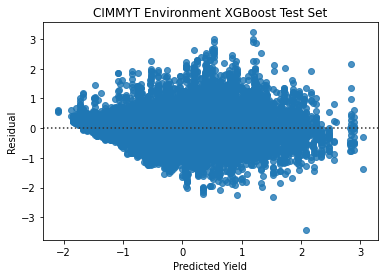

In [51]:
sns.residplot(XGB_test_pred, y_test_model['GRAIN_YIELD'])
plt.title(Data+" XGBoost Test Set")
plt.xlabel('Predicted Yield')
plt.ylabel('Residual')
plt.savefig(Data + ' xgb_test_resid.png')

In [52]:
filename = Data+"_XGB_best_params.txt"
XGB_best_params = open(filename, "r")
XGB_best_params = XGB_best_params.read()

import re

XGB_best_params = re.search('{(.*)}', XGB_best_params)
XGB_best_params = "{" + str(XGB_best_params.group(1)) + "}"

import ast
XGB_best_params = ast.literal_eval(XGB_best_params)
XGB_best_params

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 600}

In [53]:
XGB_holdout_regressor = xgb.XGBRegressor(**XGB_best_params)

In [54]:
import time
start = time.time()

XGB_fitted_holdout = XGB_holdout_regressor.fit(X_build_model, y_build_model.values.ravel())

runtime = time.time() - start
print('Total runtime was (s): {}'.format(runtime))

Total runtime was (s): 42.060298919677734


In [55]:
XGB_build_pred = XGB_fitted_holdout.predict(X_build_model)

holdout_results_grid.loc['Build','XGB']['R'] = np.corrcoef(y_build_model.iloc[:,0], XGB_build_pred)[0,1]
holdout_results_grid.loc['Build','XGB']['R_2'] = metrics.r2_score(y_build_model, XGB_build_pred)
holdout_results_grid.loc['Build','XGB']['Adj_R_2'] = 1-(1-holdout_results_grid.loc['Build','XGB']['R_2'])*(y_build_model.shape[0]-1)/(y_build_model.shape[0]-X_build_model.shape[1]-1)
holdout_results_grid.loc['Build','XGB']['RMSE'] = np.sqrt(metrics.mean_squared_error(y_build_model, XGB_build_pred))
holdout_results_grid.loc['Build','XGB']['MAE'] = metrics.mean_absolute_error(y_build_model, XGB_build_pred)

XGB_holdout_pred = XGB_fitted_holdout.predict(X_holdout_model)

holdout_results_grid.loc['Holdout','XGB']['R'] = np.corrcoef(y_holdout_model.iloc[:,0], XGB_holdout_pred)[0,1]
holdout_results_grid.loc['Holdout','XGB']['R_2'] = metrics.r2_score(y_holdout_model, XGB_holdout_pred)
holdout_results_grid.loc['Holdout','XGB']['Adj_R_2'] = 1-(1-holdout_results_grid.loc['Holdout','XGB']['R_2'])*(y_holdout_model.shape[0]-1)/(y_holdout_model.shape[0]-X_holdout_model.shape[1]-1)
holdout_results_grid.loc['Holdout','XGB']['RMSE'] = np.sqrt(metrics.mean_squared_error(y_holdout_model, XGB_holdout_pred))
holdout_results_grid.loc['Holdout','XGB']['MAE'] = metrics.mean_absolute_error(y_holdout_model, XGB_holdout_pred)

csv_name = Data + "_" + str(X_holdout_model.shape[1]) + "_XGB_Holdout_Results.csv"
holdout_results_grid.to_csv(csv_name)

holdout_results_grid

R     R_2 Adj_R_2    RMSE     MAE
CIMMYT Environment Model                                        
Build              RF     0.9344   0.873   0.873  0.3563  0.2506
                   NN     0.9107  0.8282  0.8281  0.4145  0.2952
                   XGB    0.9342  0.8726  0.8725  0.3569  0.2516
Holdout            RF     0.9106  0.8285  0.8282  0.4141   0.291
                   NN     0.9082  0.8237  0.8233  0.4198  0.3007
                   XGB    0.9083  0.8215  0.8211  0.4225  0.3076

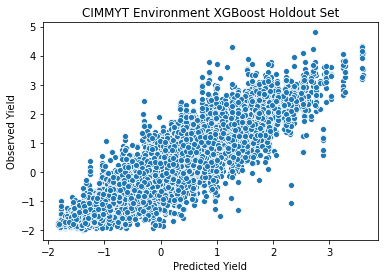

In [56]:
sns.scatterplot(XGB_holdout_pred, y_holdout_model['GRAIN_YIELD'])
plt.title(Data+" XGBoost Holdout Set")
plt.xlabel('Predicted Yield')
plt.ylabel('Observed Yield')
plt.savefig(Data + ' xgb_holdout_scatter.png')

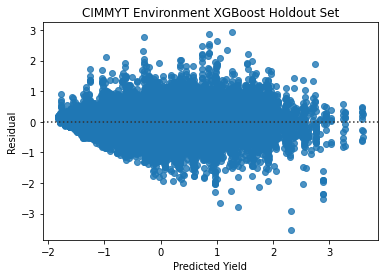

In [57]:
sns.residplot(XGB_holdout_pred, y_holdout_model['GRAIN_YIELD'])
plt.title(Data+" XGBoost Holdout Set")
plt.xlabel('Predicted Yield')
plt.ylabel('Residual')
plt.savefig(Data + ' xgb_holdout_resid.png')

## Other Approaches Tried

### TPOT

http://epistasislab.github.io/tpot/using/#tpot-with-code

In [ ]:
# %time
# import tpot

# tpot_regressor = tpot.TPOTRegressor(n_jobs=-1)

# tpot_fitted = tpot_regressor.fit(X_train_model, y_train_model.values.ravel())

In [ ]:
# import seaborn as sns
# sns.scatterplot(rf_test_pred, y_test_model['GRAIN_YIELD'])

In [ ]:
# sns.residplot(rf_test_pred, y_test_model['GRAIN_YIELD'])

### Gradient Boosted Regression

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
# GBR = sklearn.ensemble.GradientBoostingRegressor()

# parameters = {'learning_rate' : [0.008, 0.01], 'n_estimators' : [300], 
#               'subsample' : [0.7], 'max_depth' : [None]}

# GBR_regressor = GridSearchCV(GBR, parameters, scoring = 'neg_mean_squared_error', cv = 5)

In [ ]:
# start = time.time()

# GBR_fitted = GBR_regressor.fit(X_train_model, y_train_model.values.ravel())

# print('Total runtime was (s): {}'.format(time.time() - start))

Total runtime was (s): 13468.005505561829


In [ ]:
# GBR_train_pred = GBR_fitted.predict(X_train_model)

# results_grid.loc['Train','GBR']['R_2'] = metrics.r2_score(y_train_model, GBR_train_pred)
# results_grid.loc['Train','GBR']['Adj_R_2'] = 1-(1-results_grid.loc['Train','GBR']['R_2'])*(y_train_model.shape[0]-1)/(y_train_model.shape[0]-X_train_model.shape[1]-1)
# results_grid.loc['Train','GBR']['RMSE'] = np.sqrt(metrics.mean_squared_error(y_train_model, GBR_train_pred))
# results_grid.loc['Train','GBR']['MAE'] = metrics.mean_absolute_error(y_train_model, GBR_train_pred)

# GBR_test_pred = GBR_fitted.predict(X_test_model)

# results_grid.loc['Test','GBR']['R_2'] = metrics.r2_score(y_test_model, GBR_test_pred)
# results_grid.loc['Test','GBR']['Adj_R_2'] = 1-(1-results_grid.loc['Test','GBR']['R_2'])*(y_train_model.shape[0]-1)/(y_train_model.shape[0]-X_train_model.shape[1]-1)
# results_grid.loc['Test','GBR']['RMSE'] = np.sqrt(metrics.mean_squared_error(y_test_model, GBR_test_pred))
# results_grid.loc['Test','GBR']['MAE'] = metrics.mean_absolute_error(y_test_model, GBR_test_pred)

# results_grid

In [ ]:
# GBR_fitted.best_params_

{'learning_rate': 0.01,
 'max_depth': None,
 'n_estimators': 300,
 'subsample': 0.7}

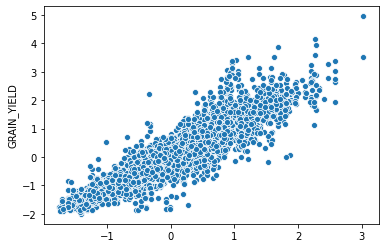

In [ ]:
# import seaborn as sns
# sns.scatterplot(rf_test_pred, y_test_model['GRAIN_YIELD'])

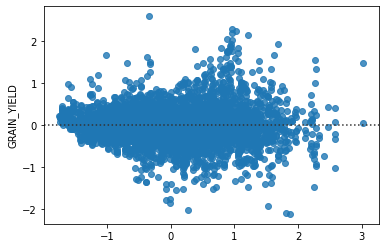

In [ ]:
# sns.residplot(rf_test_pred, y_test_model['GRAIN_YIELD'])

### AutoML SKLearn

https://automl.github.io/auto-sklearn/master/

In [ ]:
# import autosklearn.classification
# import sklearn.model_selection
# import sklearn.datasets
# import sklearn.metrics
# X, y = sklearn.datasets.load_digits(return_X_y=True)
# X_train, X_test, y_train, y_test = \
#         sklearn.model_selection.train_test_split(X, y, random_state=1)
# automl = autosklearn.classification.AutoSklearnClassifier()
# automl.fit(X_train, y_train)
# y_hat = automl.predict(X_test)
# print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))

### Support Vector Regression

Doesn't seem to converge.

In [ ]:
# # https://scikit-learn.org/stable/auto_examples/plot_kernel_ridge_regression.html
# from sklearn.svm import SVR
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import learning_curve

# SVR = SVR()

# parameters = {'C' : [1e1]}

# SVR_regressor = GridSearchCV(SVR, parameters, scoring = 'neg_mean_squared_error', cv = 5)

In [ ]:
# import time
# start = time.time()

# SVR_fitted = SVR_regressor.fit(X_train_model, y_train_model.values.ravel())

# print('Total runtime was (s): {}'.format(time.time() - start))

In [ ]:
# SVR_train_pred = SVR_fitted.predict(X_train_model)

# results_grid.loc['Train','SVR']['R_2'] = metrics.r2_score(y_train_model, SVR_train_pred)
# results_grid.loc['Train','SVR']['Adj_R_2'] = 1-(1-results_grid.loc['Train','SVR']['R_2'])*(y_train_model.shape[0]-1)/(y_train_model.shape[0]-X_train_model.shape[1]-1)
# results_grid.loc['Train','SVR']['RMSE'] = np.sqrt(metrics.mean_squared_error(y_train_model, SVR_train_pred))
# results_grid.loc['Train','SVR']['MAE'] = metrics.mean_absolute_error(y_train_model, SVR_train_pred)

# SVR_test_pred = SVR_fitted.predict(X_test_model)

# results_grid.loc['Test','SVR']['R_2'] = metrics.r2_score(y_test_model, SVR_test_pred)
# results_grid.loc['Test','SVR']['Adj_R_2'] = 1-(1-results_grid.loc['Test','SVR']['R_2'])*(y_train_model.shape[0]-1)/(y_train_model.shape[0]-X_train_model.shape[1]-1)
# results_grid.loc['Test','SVR']['RMSE'] = np.sqrt(metrics.mean_squared_error(y_test_model, SVR_test_pred))
# results_grid.loc['Test','SVR']['MAE'] = metrics.mean_absolute_error(y_test_model, SVR_test_pred)

# results_grid

## Other Resources

In [ ]:
# https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

In [ ]:
# Pipelining Tutorial
# https://towardsdatascience.com/hyper-parameter-tuning-and-model-selection-like-a-movie-star-a884b8ee8d68

# Hint: If Medium gives you paywalls, 
# you can usually get around them by opening the window in incognito mode

In [ ]:
# Gradient Boosting Regression Example
# https://towardsdatascience.com/a-complete-machine-learning-project-walk-through-in-python-part-two-300f1f8147e2

In [ ]:
# Regularized Boosting with XGBoost
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [ ]:
# Speeding things up with PySpark
# https://www.analyticsvidhya.com/blog/2019/11/build-machine-learning-pipelines-pyspark/